In [13]:
import joblib
import networkx as nx
import scipy.sparse as sp

# Chemins vers les fichiers
networkx_file = './G_network.jbl'

# Charger l'objet NetworkX
G = joblib.load(networkx_file)
print(f"NetworkX Graph: {G}")

# Convertir le graphe en matrice sparse
sparse_matrix = nx.adjacency_matrix(G,weight="weight")
print(f"Sparse Matrix: {sparse_matrix}")

# Convertir la matrice sparse en un tableau NumPy
numpy_array = sparse_matrix.toarray()
# Vous pouvez également utiliser `todense()` qui renvoie un objet matrix de NumPy
# numpy_array = sparse_matrix.todense()

print(f"NumPy Array: \n{numpy_array}")

# Optionnel: Afficher quelques informations sur les objets chargés
print(f"Number of nodes in graph: {G.number_of_nodes()}")
print(f"Number of edges in graph: {G.number_of_edges()}")
print(f"Shape of sparse matrix: {sparse_matrix.shape}")
print(f"Number of non-zero elements in sparse matrix: {sparse_matrix.nnz}")
print(f"Shape of NumPy array: {numpy_array.shape}")


NetworkX Graph: Graph with 2056 nodes and 2410 edges
Sparse Matrix:   (0, 1)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 8)	1
  (0, 11)	1
  (0, 13)	1
  (0, 14)	1
  (0, 15)	1
  (0, 17)	1
  (0, 19)	1
  (0, 20)	1
  (0, 21)	1
  (0, 22)	1
  (0, 28)	1
  (0, 29)	1
  (0, 31)	1
  (0, 32)	1
  (0, 37)	1
  (0, 39)	1
  (0, 40)	1
  (0, 42)	1
  (0, 43)	1
  (0, 45)	1
  :	:
  (2031, 3)	1
  (2032, 13)	1
  (2033, 0)	1
  (2034, 13)	1
  (2035, 0)	1
  (2036, 0)	1
  (2037, 687)	1
  (2038, 13)	1
  (2039, 0)	1
  (2040, 0)	1
  (2041, 3)	1
  (2042, 3)	1
  (2043, 0)	1
  (2044, 0)	1
  (2045, 673)	1
  (2046, 17)	1
  (2047, 3)	1
  (2048, 84)	1
  (2049, 13)	1
  (2050, 3)	1
  (2051, 0)	1
  (2052, 3)	1
  (2053, 3)	1
  (2054, 825)	1
  (2055, 0)	1
NumPy Array: 
[[0 1 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
Number of nodes in graph: 2056
Number of edges in graph: 2410
Shape of sparse matrix: (2056, 2056)
Number of non-zero elements in sparse

In [2]:
import joblib
import networkx as nx


networkx_file = './G_network.jbl'

G = joblib.load(networkx_file)


if all('weight' in data for _, _, data in G.edges(data=True)):
    # Extract edge weights
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}
else:
    edge_weights = {(u, v): data.get('weight', None) for u, v, data in G.edges(data=True)}


for edge, weight in edge_weights.items():
    if weight != None : 
        print(f"Edge {edge}: Weight {weight}")


NetworkX Graph: Graph with 2056 nodes and 2410 edges
Edge Weights:


In [17]:
edge_weights = nx.get_edge_attributes(G, 'weight')
print("Dictionnaire des poids des arêtes:")
print(edge_weights)

Dictionnaire des poids des arêtes:
{}


NetworkX Graph: Graph with 2056 nodes and 2410 edges
Number of nodes in graph: 2056
Number of edges in graph: 2410


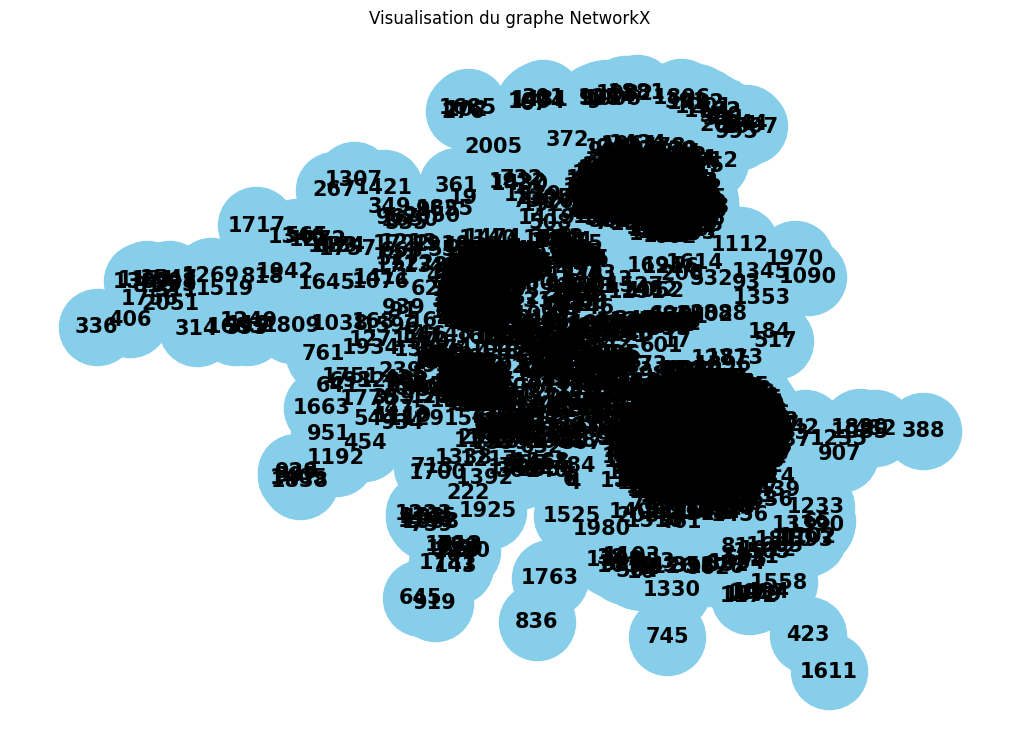

In [18]:
import joblib
import networkx as nx
import matplotlib.pyplot as plt

# Chemin vers le fichier
networkx_file = './G_network.jbl'

# Charger l'objet NetworkX
G = joblib.load(networkx_file)
print(f"NetworkX Graph: {G}")

# Optionnel: Afficher quelques informations sur le graphe
print(f"Number of nodes in graph: {G.number_of_nodes()}")
print(f"Number of edges in graph: {G.number_of_edges()}")

# Dessiner le graphe
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Positions des nœuds pour un layout agréable
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', font_size=15, font_weight='bold')
plt.title("Visualisation du graphe NetworkX")
plt.show()


In [14]:
Taux_echange= numpy_array 

In [15]:
Taux_echange

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [21]:
import numpy as np
import networkx as nx

# Define the exchange rates as a dictionary of dictionaries
exchange_rates = {
    'USD': {'EUR': 0.91, 'GBP': 0.81, 'JPY': 101, 'AUD': 1.42},
    'EUR': {'USD': 1.10, 'GBP': 0.87, 'JPY': 116, 'AUD': 1.60},
    'GBP': {'USD': 1.23, 'EUR': 1.15, 'JPY': 135, 'AUD': 1.78},
    'JPY': {'USD': 0.0098, 'EUR': 0.0087, 'GBP': 0.0074, 'AUD': 0.0141},
    'AUD': {'USD': 0.73, 'EUR': 0.63, 'GBP': 0.56, 'JPY': 72}
}

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights as negative logarithms of exchange rates
for src in exchange_rates:
    for dest in exchange_rates[src]:
        rate = exchange_rates[src][dest]
        weight = -np.log(rate)
        G.add_edge(src, dest, weight=weight)

# Function to detect negative cycles using Bellman-Ford
def find_negative_cycle(graph, source):
    distances = {node: float('inf') for node in graph.nodes}
    predecessors = {node: None for node in graph.nodes}
    distances[source] = 0

    for _ in range(len(graph.nodes) - 1):
        for u, v, data in graph.edges(data=True):
            if distances[u] + data['weight'] < distances[v]:
                distances[v] = distances[u] + data['weight']
                predecessors[v] = u

    # Check for negative cycles
    for u, v, data in graph.edges(data=True):
        if distances[u] + data['weight'] < distances[v]:
            cycle = []
            node = v
            while True:
                cycle.append(node)
                node = predecessors[node]
                if node in cycle:
                    cycle.append(node)
                    cycle = cycle[cycle.index(node):]
                    return cycle
    return None

# Look for arbitrage opportunities from each currency
for currency in exchange_rates:
    cycle = find_negative_cycle(G, currency)
    if cycle:
        print(f"Arbitrage opportunity detected: {cycle}")
        break
else:
    print("No arbitrage opportunities detected")


Arbitrage opportunity detected: ['AUD', 'JPY', 'AUD']
